In [15]:
# ***Chris Barber concieved of and carried out this analysis first (I am replicating it here and any bugs are my own)***

#Data sources:
#http://www.erswhitebook.org/files/public/Supplementary%20Material/Interstital%20Lung%20Disease/WB_ILD_supplement.xlsx
#http://www.erswhitebook.org/files/public/Supplementary%20Material/Occupational%20Lung%20Disease/WB_occupation_supplement.xlsx
    
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats.stats import pearsonr

meso = pd.read_csv('../data/ers_whitebook/eu_meso_mort.csv', skiprows=2)
ipf = pd.read_csv('../data/ers_whitebook/eu_ipf_mort.csv', skiprows=2)

meso = meso[['Country', 'Mesothelioma']][:28] #eu per 100,000 age standardised meso mort by country
ipf = ipf[['Country', 'Idiopathic fibrosing alveolitis and other ILD']][:28] #eu per 100,000 age standardised meso mort by country

ipfmeso = pd.merge(ipf,meso).dropna() #this drops Greece because don't have IPF and Meso data for Greece

ipfmeso.columns = ['Country','Idiopathic pulmonary fibrosis','Mesothelioma']

In [16]:
ipfmeso.head()

,Country,Idiopathic pulmonary fibrosis,Mesothelioma
0,Austria,0.84,0.80
1,Belgium,1.59,1.26
2,Bulgaria,0.12,0.06
3,Cyprus,2.57,0.63
4,Czech Republic,1.27,0.29


In [17]:
ipfmeso.Country.nunique()

27

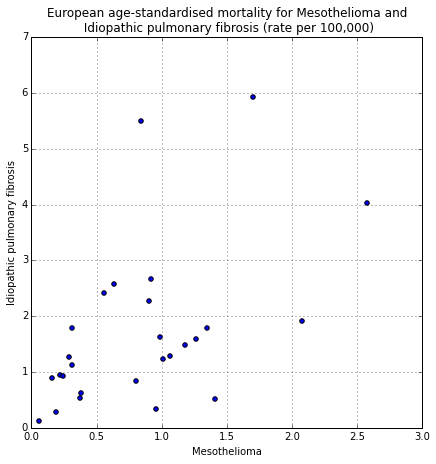

In [29]:
ax = ipfmeso.plot(kind='scatter', x='Mesothelioma', y='Idiopathic pulmonary fibrosis', ylim=(0,7), xlim=(0,3), figsize=(7, 7), title='European age-standardised mortality for Mesothelioma and \n Idiopathic pulmonary fibrosis (rate per 100,000)')
fig = ax.get_figure()
fig.savefig('.././fig/EuropeanMortalityMesotheliomaIPF.png')



In [22]:
ipfmeso.corr(method='pearson')

,Idiopathic pulmonary fibrosis,Mesothelioma
Idiopathic pulmonary fibrosis,1.000000,0.508095
Mesothelioma,0.508095,1.000000


In [23]:
pearsonr(ipfmeso.Meso, ipfmeso.IPF)

(0.50809485103217877, 0.0068135519757501024)